In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec as gs
from scipy import cluster as scl

In [2]:
%matplotlib inline

In [3]:
# Set path
path_root = '/data/cisl/yassinebha/scratch_pin//pleio/pleio_all_tasks/'
path_pleio = os.path.join(path_root,'pleio_2018-07-26')


In [4]:
# Load variables
## Spatial subtypes from all tasks (90 tasks)
spatial_subt_df = pd.read_csv(os.path.join(path_root,'all_subtype_stack.csv'))

## Subjects weigts from all subtypes tasks  (90 tasks)
weight_subt_df = pd.read_csv(os.path.join(path_root,'subtype_weights_all_tasks.csv'))

## Subject weights and covariates (age,gender,FD,BMI)
weight_subt_cov_df = pd.read_csv(os.path.join(path_root,'pleio_all_pheno.csv'))

## Genetic correlation matrix of subtypes weights
RhoG = np.load(os.path.join(path_pleio, 'RhoG.npy'))

## FDR of genetic corrrelation matrix
RhoG_fdr =  np.load(os.path.join(path_pleio, 'RhoG_pval_0.npy'))


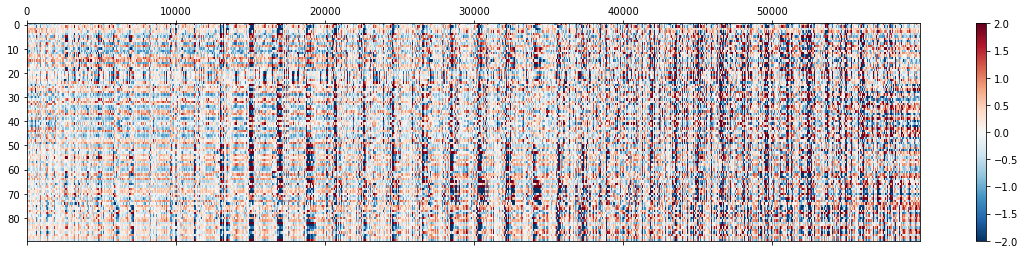

In [5]:
# Plot spatial subtypes stack

f = plt.figure(figsize=(20,4))
ax = f.add_subplot(111)
p = ax.matshow(spatial_subt_df.values.T, aspect='auto', vmin=-2, vmax=2, cmap=plt.cm.RdBu_r)
plt.colorbar(p)


In [6]:
weight_subt_df.drop(columns='ID')

,EMO_contrast_fear_vs_neut_sub1,EMO_contrast_fear_vs_neut_sub2,EMO_contrast_fear_vs_neut_sub3,EMO_contrast_fear_vs_neut_sub4,EMO_contrast_fear_vs_neut_sub5,SOC_mental_sub1,SOC_mental_sub2,SOC_mental_sub3,SOC_mental_sub4,SOC_mental_sub5,...,WM_0bk_sub1,WM_0bk_sub2,WM_0bk_sub3,WM_0bk_sub4,WM_0bk_sub5,LAN_story_sub1,LAN_story_sub2,LAN_story_sub3,LAN_story_sub4,LAN_story_sub5
0,-0.228,0.027,0.175,0.152,-0.016,-0.140,-0.093,-0.241,0.138,0.261,...,0.354,0.080,0.210,-0.246,-0.391,0.049,-0.063,0.084,-0.134,0.040
1,0.458,-0.186,-0.551,-0.372,0.310,0.385,0.049,0.621,-0.466,-0.612,...,0.146,-0.543,0.755,-0.742,-0.227,-0.547,0.570,-0.522,-0.197,0.317
2,-0.534,0.098,0.587,0.464,-0.258,-0.141,0.110,-0.154,0.076,0.157,...,-0.451,0.095,-0.463,0.507,0.474,0.060,-0.038,0.053,-0.003,-0.056
3,-0.005,-0.287,-0.163,-0.092,0.340,0.273,0.180,0.196,-0.318,-0.244,...,0.324,0.706,-0.493,0.434,-0.342,-0.323,0.290,-0.301,-0.224,0.314
4,0.033,0.073,0.003,-0.017,-0.067,0.307,0.046,0.189,-0.226,-0.251,...,-0.107,-0.543,0.541,-0.511,0.070,-0.004,-0.032,0.025,-0.042,0.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0.155,-0.032,-0.165,-0.200,0.096,0.303,0.219,-0.027,-0.266,-0.076,...,-0.228,0.284,-0.545,0.566,0.274,0.377,-0.321,0.356,0.252,-0.393
722,-0.350,0.200,0.554,0.377,-0.422,-0.678,-0.204,-0.706,0.663,0.793,...,-0.423,0.297,-0.714,0.756,0.475,0.509,-0.486,0.478,0.298,-0.421
723,0.309,0.035,-0.321,-0.375,0.123,-0.248,-0.156,-0.428,0.317,0.441,...,0.083,0.434,-0.366,0.342,-0.117,-0.066,0.121,-0.058,-0.034,-0.044
724,-0.212,0.160,0.299,0.137,-0.210,-0.175,0.070,-0.278,0.131,0.278,...,-0.229,-0.337,0.157,-0.130,0.280,0.089,-0.042,0.079,0.113,-0.171


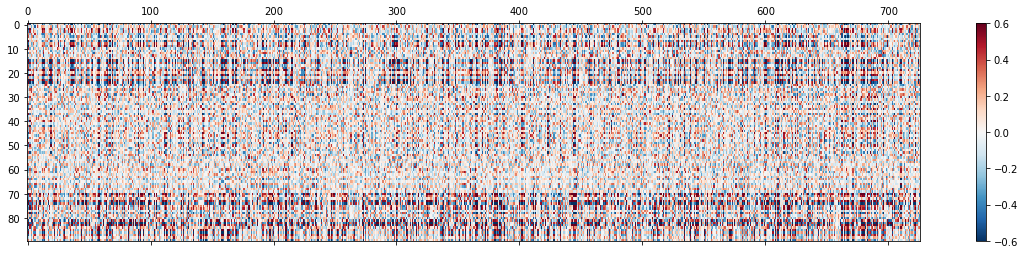

In [7]:
# Plot subtypes weights stack

f = plt.figure(figsize=(20,4))
ax = f.add_subplot(111)
p = ax.matshow(weight_subt_df.drop(columns='ID').values.T, aspect='auto', vmin=-0.6, vmax=0.6, cmap=plt.cm.RdBu_r)
plt.colorbar(p)


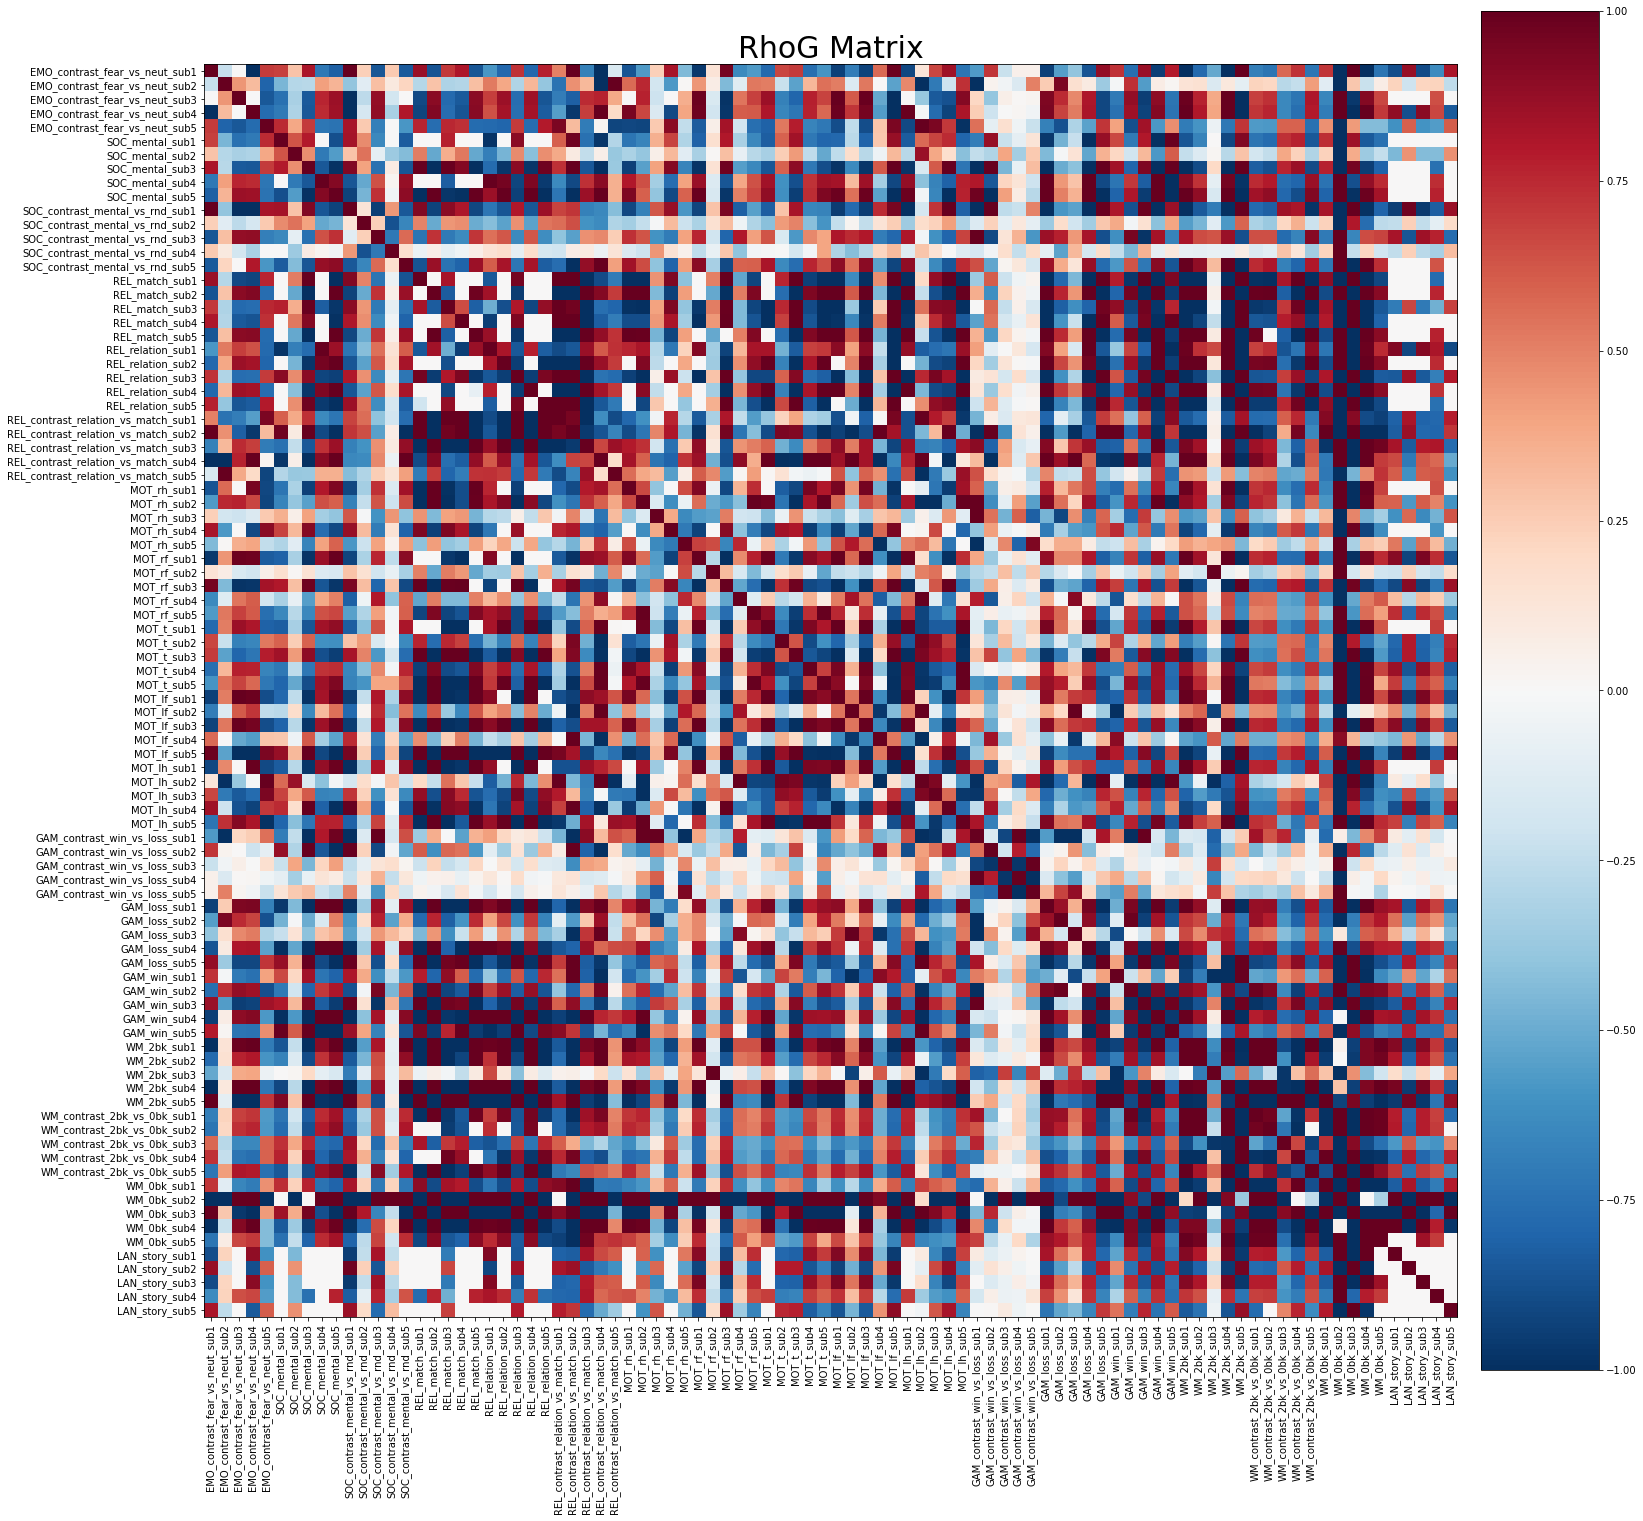

In [8]:
# Plot RhoG matrix
subt_name = weight_subt_df.columns.drop('ID').tolist()
gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(25,25))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(RhoG,cmap =plt.cm.RdBu_r,interpolation='none')
ax.set_yticks(range(len(subt_name)))
ax.set_yticklabels(subt_name)
ax.set_xticks(range(len(subt_name)))
ax.set_xticklabels(subt_name, rotation=90)
ax.set_title('RhoG Matrix',fontsize=30)
f.colorbar(p, cax=axcl)

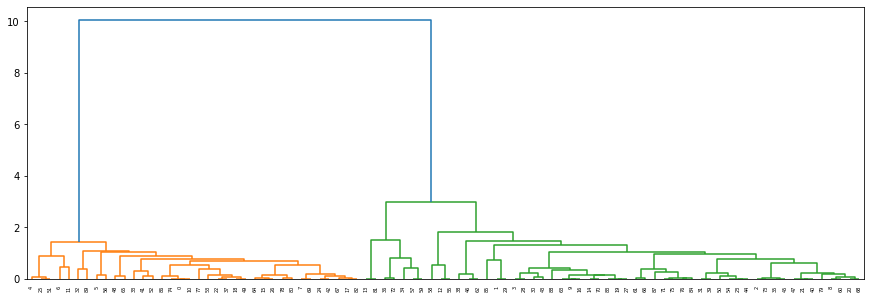

In [9]:
## Cluster rhoG matrix
# Number of subtypes
n_sbt = 8
# hierachical clustering
svec = RhoG[np.triu_indices(len(RhoG),1)]
dist = 1 - svec
link = scl.hierarchy.linkage(dist, method='ward')
part = scl.hierarchy.fcluster(link, n_sbt, criterion='maxclust')
order = scl.hierarchy.dendrogram(link, no_plot=True)['leaves']
plt.figure(figsize=(15, 5))
dn = scl.hierarchy.dendrogram(link)

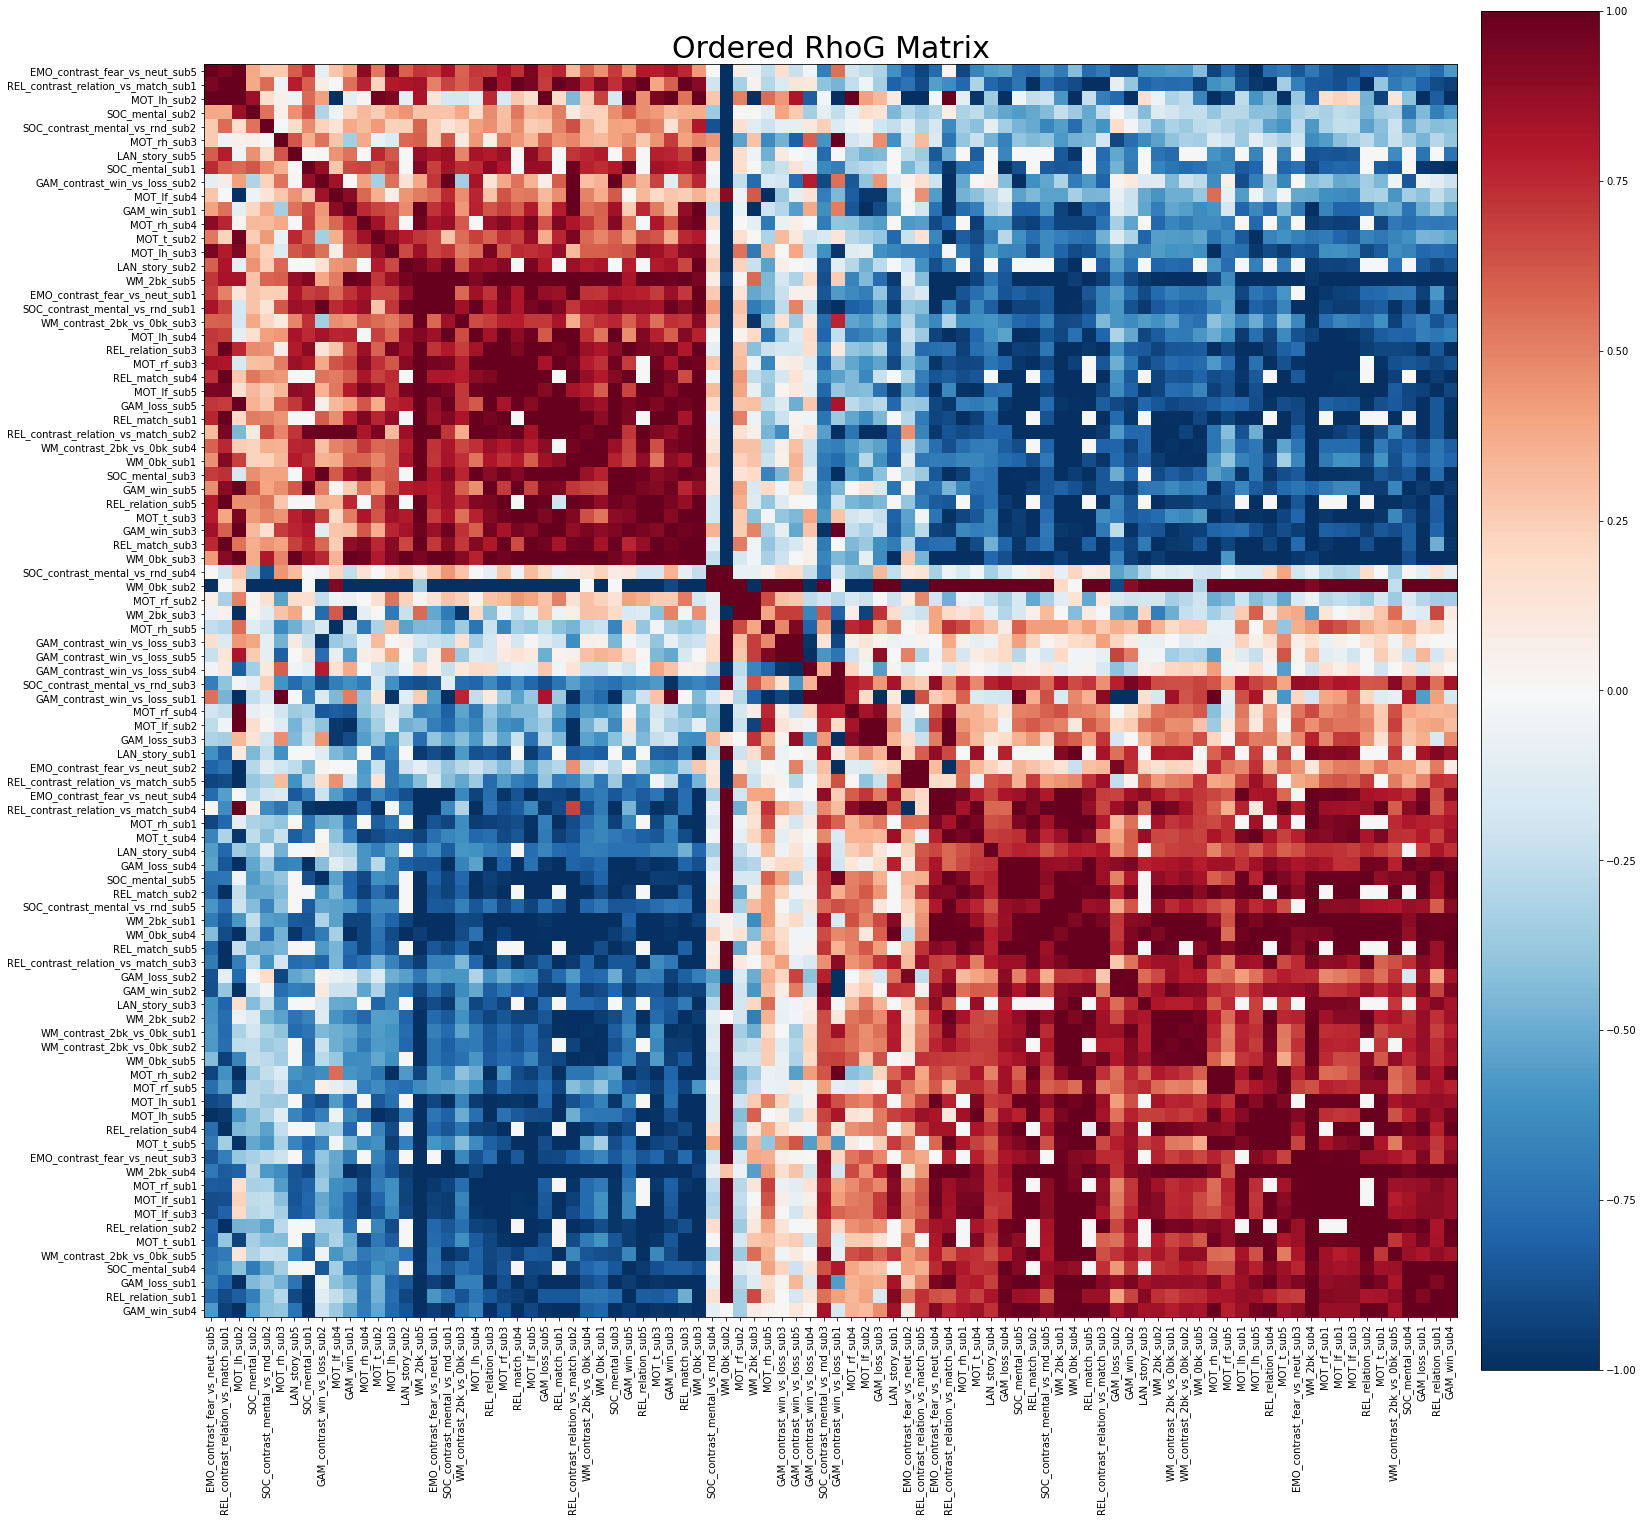

In [10]:
# Plot RhoG ordered by hierarchy
subt_name = weight_subt_df.columns.drop('ID').tolist()
subt_name_order = [subt_name[ord] for ord in order]

gsp = gs.GridSpec(1, 10)
f = plt.figure(figsize=(25,25))
ax = f.add_subplot(gsp[0,:9])
axcl = f.add_subplot(gsp[0,9])
p = ax.imshow(RhoG[order, :][:, order],cmap =plt.cm.RdBu_r,interpolation='none')
ax.set_yticks(range(len(subt_name)))
ax.set_yticklabels(subt_name_order)
ax.set_xticks(range(len(subt_name)))
ax.set_xticklabels(subt_name_order, rotation=90)
ax.set_title('Ordered RhoG Matrix',fontsize=30)
f.colorbar(p, cax=axcl)